In [11]:
import matplotlib.pyplot as plt
import os, requests
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
## download the dataset
# Directory of the raw data files
_data_root = './data/Diabetes'
# Path to the raw training data
_data_filepath = os.path.join(_data_root, 'Diabetes.csv')
# Download data
os.makedirs(_data_root, exist_ok=True)
if not os.path.isfile(_data_filepath):
  #https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/
  url = 'https://docs.google.com/uc?export= \
  download&confirm={{VALUE}}&id=1k5-1caezQ3zWJbKaiMULTGq-3sz6uThC'
  r = requests.get(url, allow_redirects=True, stream=True)
  open(_data_filepath, 'wb').write(r.content)


In [12]:
df = pd.read_csv("data/Diabetes/Diabetes.csv", encoding="utf8")

In [13]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [17]:
df = df.replace("?",np.nan)
len(df.select_dtypes('O').columns)

37

In [18]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [14]:
df.isnull().sum()[df.isnull().sum()>1]/len(df)*100

max_glu_serum    94.746772
A1Cresult        83.277322
dtype: float64

In [ ]:
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

In [ ]:
df['readmitted'].unique()

readmitted
0    90409
1    11357
Name: count, dtype: int64


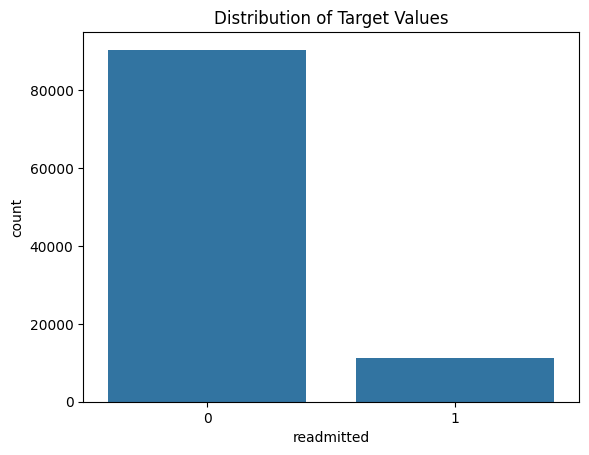

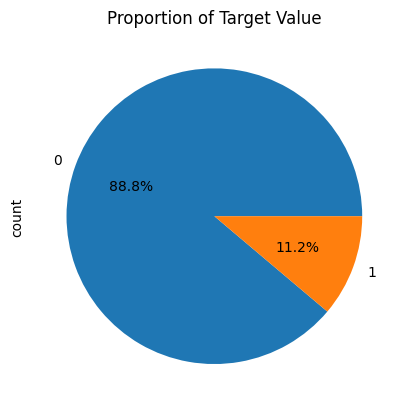

In [23]:
df = df.replace({"NO":0,
                    "<30":1,
                    ">30":0})

print(df.readmitted.value_counts())

sns.countplot(x = "readmitted", data = df)
plt.title("Distribution of Target Values")
plt.show()

df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

Proportion of Race
race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: proportion, dtype: float64


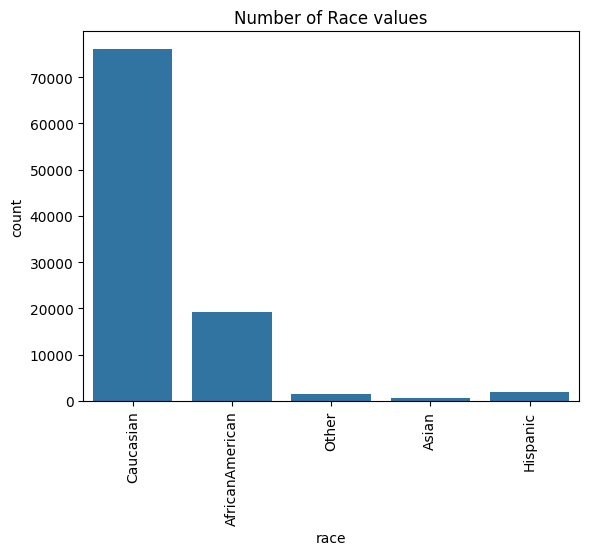

In [25]:
print("Proportion of Race")
print(df.race.value_counts(normalize = True)*100)


sns.countplot(x=df.race, data = df)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

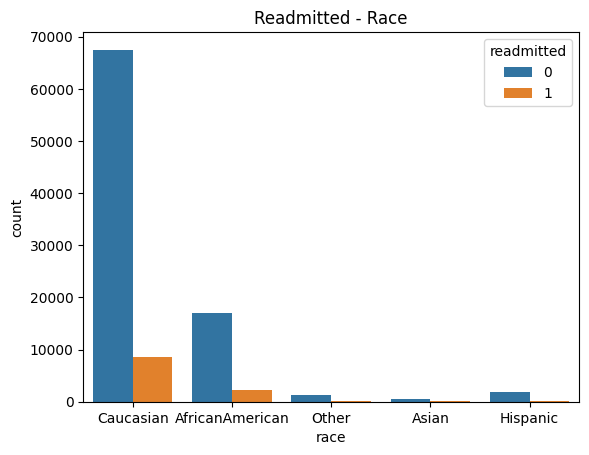

In [26]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

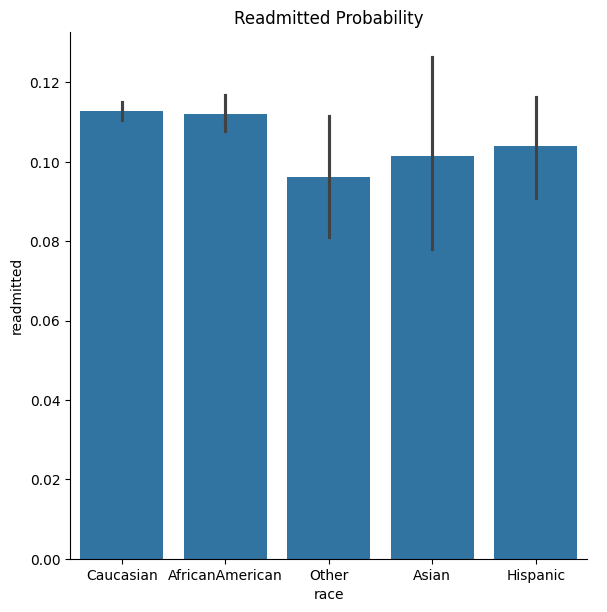

In [27]:
sns.catplot(x = "race", y = "readmitted",data = df, kind = "bar", height= 6)
plt.title("Readmitted Probability")
plt.show()

Proportions of Race Value
gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64


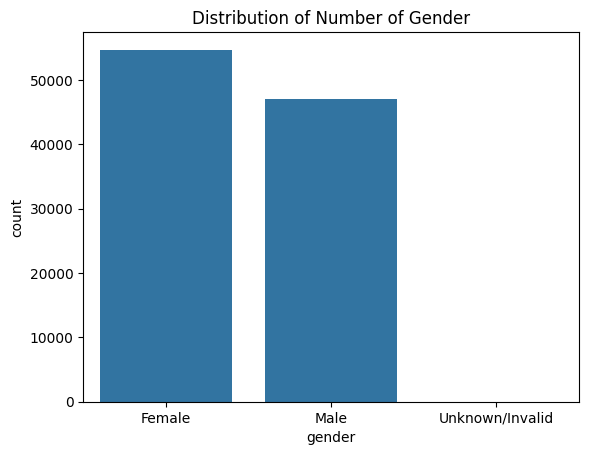

In [28]:
print("Proportions of Race Value")
print(df.gender.value_counts(normalize = True))

sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender")
plt.show()

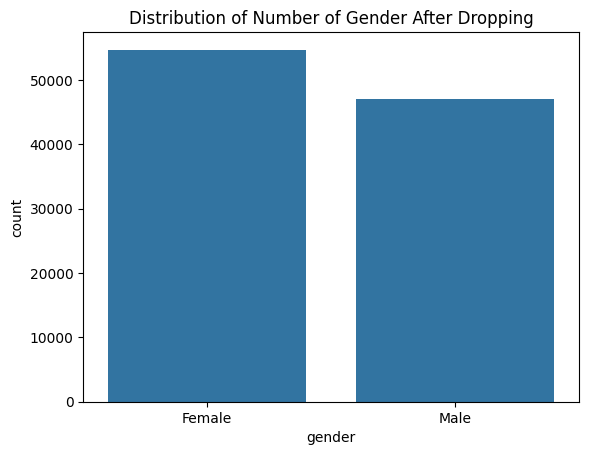

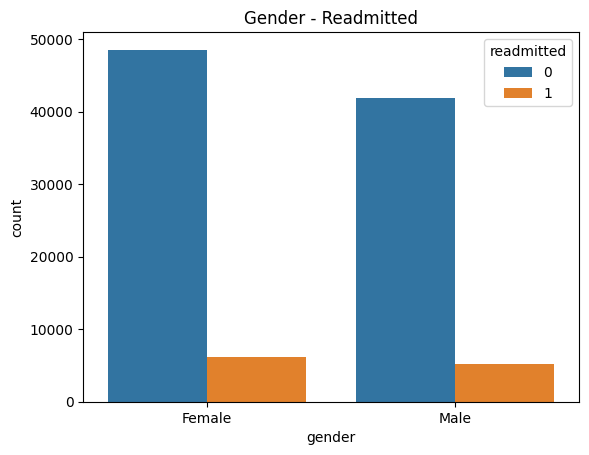

In [29]:
df = df.drop(df.loc[df["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = df)
plt.title("Gender - Readmitted")
plt.show()

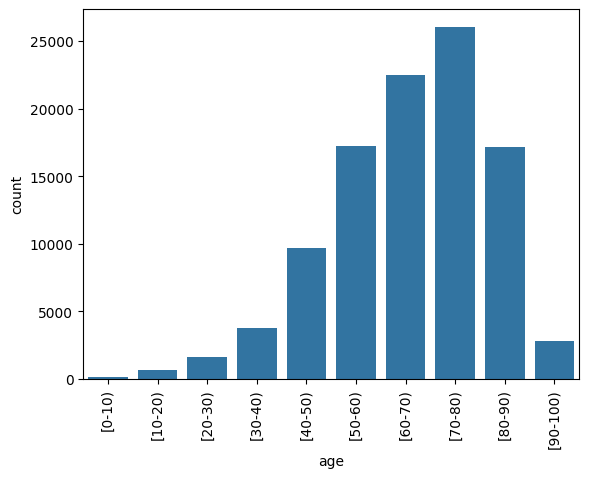

In [30]:
sns.countplot(x="age", data = df)
plt.xticks(rotation = 90)
plt.show()

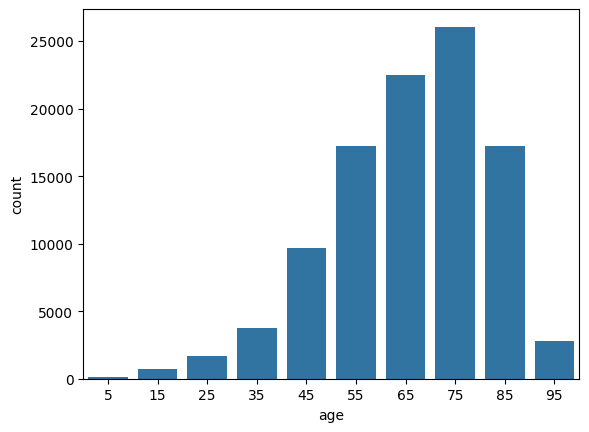

In [31]:
df.age = df.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = df)
plt.show()

Distribution of ID's
admission_type_id
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64


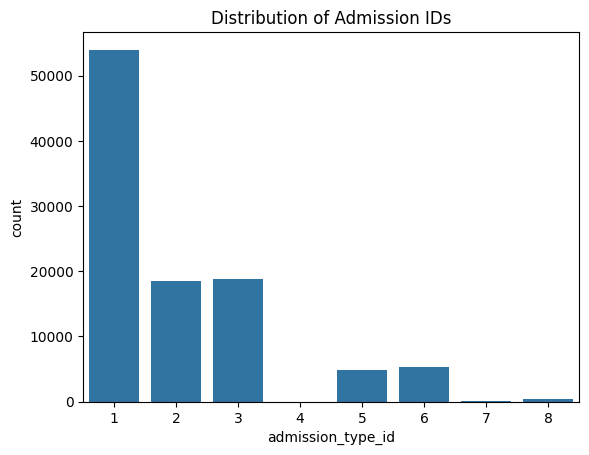

In [32]:
print("Distribution of ID's")
print(df.admission_type_id.value_counts())

sns.countplot(x = "admission_type_id", data = df)
plt.title("Distribution of Admission IDs")
plt.show()

-Distribution of ID's-
admission_type_id
Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: count, dtype: int64


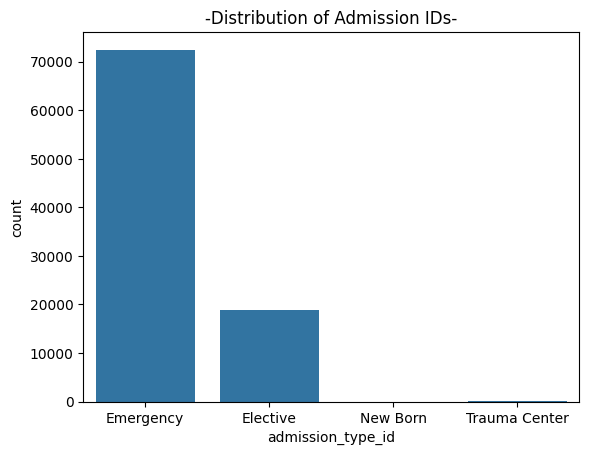

In [33]:
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

df.admission_type_id = df.admission_type_id.replace(mapped)

print("-Distribution of ID's-")
print(df.admission_type_id.value_counts())

sns.countplot(x = "admission_type_id", data = df)
plt.title("-Distribution of Admission IDs-")
plt.show()

In [34]:
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

df["discharge_disposition_id"] = df["discharge_disposition_id"].replace(mapped_discharge)

Proportions of ID's
discharge_disposition_id
Discharged to Home    73649
Other                 23434
Name: count, dtype: int64


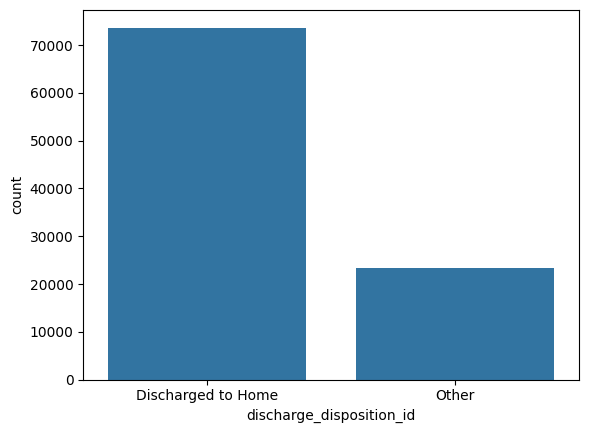

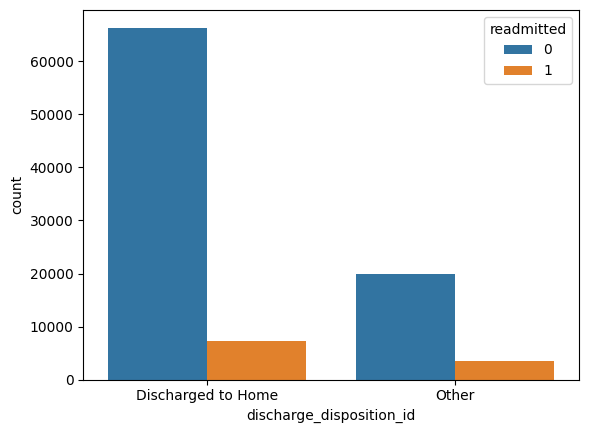

In [35]:
print("Proportions of ID's")
print(df.discharge_disposition_id.value_counts())

sns.countplot(x ="discharge_disposition_id", data = df)
plt.show()

sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = df)
plt.show()

admission_source_id
Emergency    57492
Referral     30855
Other         6474
Name: count, dtype: int64


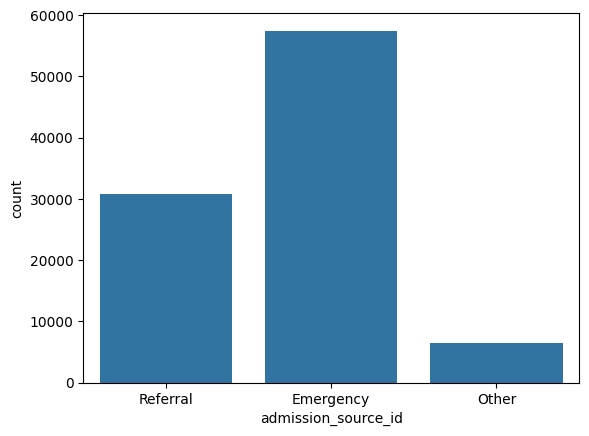

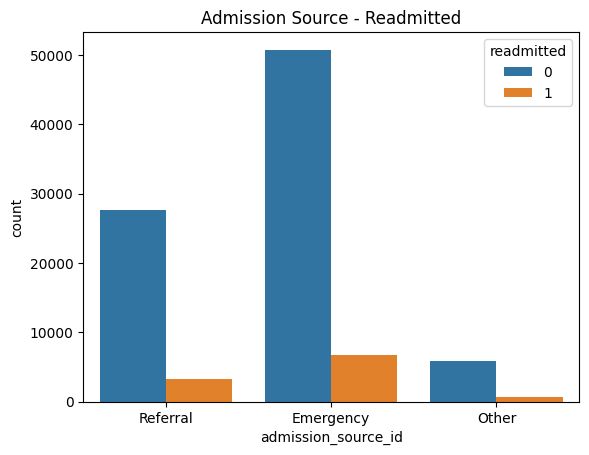

In [36]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
df.admission_source_id = df.admission_source_id.replace(mapped_adm)
print(df.admission_source_id.value_counts())

sns.countplot(x = "admission_source_id", data = df)
plt.show()

sns.countplot(x = "admission_source_id", hue = "readmitted", data = df)
plt.title("Admission Source - Readmitted")
plt.show()

time_in_hospital
3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64


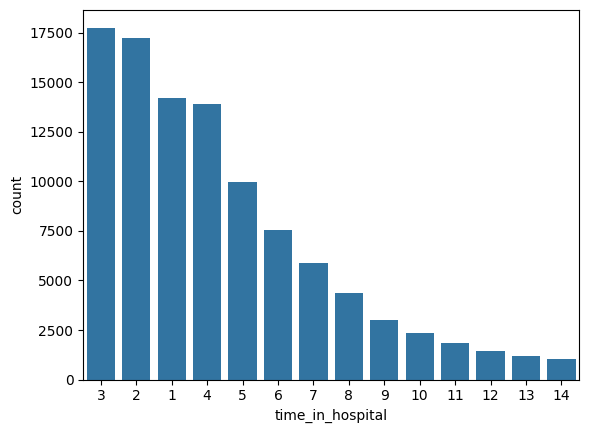

In [37]:
print(df.time_in_hospital.value_counts())

sns.countplot(x="time_in_hospital", data = df,
              order = df.time_in_hospital.value_counts().index)
plt.show()

In [38]:
df['race'] = df['race'].fillna(df['race'].mode()[0])

df['admission_type_id'] = df['admission_type_id'].fillna(df['admission_type_id'].mode()[0])

df['discharge_disposition_id'] = df['discharge_disposition_id'].fillna(df['discharge_disposition_id'].mode()[0])

df['admission_source_id'] = df['admission_source_id'].fillna(df['admission_source_id'].mode()[0])

In [39]:
cat_data = df.select_dtypes('O')
num_data = df.select_dtypes(np.number)

cat_data

,race,gender,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diag_1,diag_2,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,NaN,Emergency,Discharged to Home,Referral,NaN,Pediatrics-Endocrinology,250.83,NaN,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,NaN,Emergency,Discharged to Home,Emergency,NaN,NaN,276,250.01,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,NaN,Emergency,Discharged to Home,Emergency,NaN,NaN,648,250,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,NaN,Emergency,Discharged to Home,Emergency,NaN,NaN,8,250.43,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,NaN,Emergency,Discharged to Home,Emergency,NaN,NaN,197,157,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,NaN,Emergency,Other,Emergency,MC,NaN,250.13,291,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,NaN,Emergency,Other,Other,MC,NaN,560,276,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,NaN,Emergency,Discharged to Home,Emergency,MC,NaN,38,590,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,NaN,Emergency,Other,Emergency,MC,Surgery-General,996,285,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [40]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in cat_data:
  cat_data[i] = LE.fit_transform(cat_data[i])

In [41]:
data = pd.concat([num_data,cat_data],axis=1)
data.head()
data['glipizide'].unique()

array([1, 2, 3, 0])

In [42]:
data.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,5,1,41,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1,15,3,59,0,18,0,0,0,9,0,...,0,0,3,1,0,0,0,0,0,1
2,25,2,11,5,13,2,0,1,6,0,...,0,0,1,1,0,0,0,0,1,1
3,35,2,44,1,16,0,0,0,7,0,...,0,0,3,1,0,0,0,0,0,1
4,45,1,51,0,8,0,0,0,5,0,...,0,0,2,1,0,0,0,0,0,1


In [43]:
X = data.drop('readmitted',axis=1)
y = data['readmitted']

In [44]:
# Generación de conjuntos de validación, entrenamiento y prueba.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [46]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)
X_val_scaled = pd.DataFrame(SC.transform(X_val),columns=X_val.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [47]:
RF = RandomForestClassifier()

RF.fit(X_train_scaled,y_train)

RF.score(X_train_scaled,y_train)

1.0

In [48]:
RF.score(X_val_scaled,y_val)

0.8870531875690947

In [49]:
RF.score(X_test_scaled,y_test)

0.8890089913034933

In [50]:
y_pred = RF.predict(X_test)

In [51]:
confusion_matrix(y_test,y_pred)

array([[17250,   834],
       [ 2089,   180]])

In [52]:
accuracy_score(y_test,y_pred)

0.8563848081363926